# <span style="color:#336699">CAP-394 - Introdução à Data Science</span>
<hr style="border:2px solid #336699;">

- Gilberto Ribeiro de Queiroz
- Rafael Duarte Coelho dos Santos

# <span style="color:#336699">WTSS - Web Time Series Service</span>

[<img src="https://avatars1.githubusercontent.com/u/12664233?s=200&v=4" alt="GeoPandas" width="100" align="right">](https://github.com/e-sensing/wtss.py)


Colaboradores:
- Alber Sanchez
- Lubia Vinhas
- Rolf Simões
- Vitor Gomes

## <span style="color:#336699">e-Sensing: Big Earth observation data analytics for land use and land cover change information</span>
<hr style="border:1px solid #336699;">

The e-Sensing project aims to conceive, build and deploy a knowledge platform for organizing, accessing, processing and analysing big Earth Observation data. The São Paulo Research Foundation (FAPESP) funded this project for four years (2015-2018).

<table>
    <tr>
        <td><img src="img/conceptual_esensing.png" alt="e-Sensing conceptual view" width="640;"/></td>
    </tr>
</table> 

### <span style="color:#336699">The Architecture</span>
<hr style="border:0.5px solid #336699;">

This is the conceptual view of our architecture:
- __R__ analytics
- array databases
- web services of time series of images

<table>
    <tr>
        <td><img src="img/architecture_esensing.png" alt="e-Sensing architecture" width="640;"/></td>
    </tr>
</table>

### <span style="color:#336699">The e-Sensing Data Cube </span>
<hr style="border:0.5px solid #336699;">

Our approach is based on data cubes which provide time series of EO data to be analyzed using the "time-first space-later" approach. This approach is so far unavaliable in other open platforms.

<table>
    <tr>
        <td><img src="img/timefirst.png" alt="time-first, space-later" width="640;"/></td>
    </tr>
</table>

## <span style="color:#336699">WTSS - Web Time Series Service</span>
<hr style="border:1px solid #336699;">

The **__W__**eb **__T__**ime **__S__**eries **__S__**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. It exposes three operations:

- **`list_coverages`**: get the list of available coverages.<br><br>

- **`describe_coverage`**: get metadata about a specific coverage.<br><br>

- **`time_series`**: get a time series for a given location and time interval.<br><br>


We have a WTSS server running at INPE. We show next how to use a WTSS **__R__** client, and how to integrate it with other **__R__** packages.

1. Load the WTSS R client:

In [9]:
library(wtss)

2. Connect to a WTSS server:

In [10]:
server <- WTSS("http://www.esensing.dpi.inpe.br/wtss")

3. Retrieve the available coverages:

In [11]:
coverages <- listCoverages(server)

In [12]:
coverages

[1] "MOD13Q1"

4. Select and examine a coverage:

In [13]:
cv_name <- "MOD13Q1"

cv_scheme <- describeCoverage(server, cv_name)

dput(cv_scheme)

list(MOD13Q1 = list(name = "MOD13Q1", description = "Vegetation Indices 16-Day L3 Global 250m", 
    detail = "https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1", 
    dimensions = list(x = list(name = "col_id", min_idx = 1L, 
        max_idx = 9600L), y = list(name = "row_id", min_idx = 1L, 
        max_idx = 14400L), t = list(name = "time_id", min_idx = 1L, 
        max_idx = 412L)), spatial_extent = list(xmin = -69.2820322946525, 
        xmax = -39.9999999994056, ymin = -29.9999999973059, ymax = 0), 
    spatial_resolution = list(x = 0.00208699421859422, y = 0.00208699421859234), 
    crs = list(proj4 = "+proj=longlat +datum=WGS84 +no_defs ", 
        wkt = "GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]]"), 
    timelin

In [14]:
cv_scheme[[cv_name]]$attributes$name

[1] "mir"  "blue" "nir"  "red"  "evi"  "ndvi"

5. Retrieve the time series for a given location:

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=BRAZIL&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=BRAZIL&sensor=false


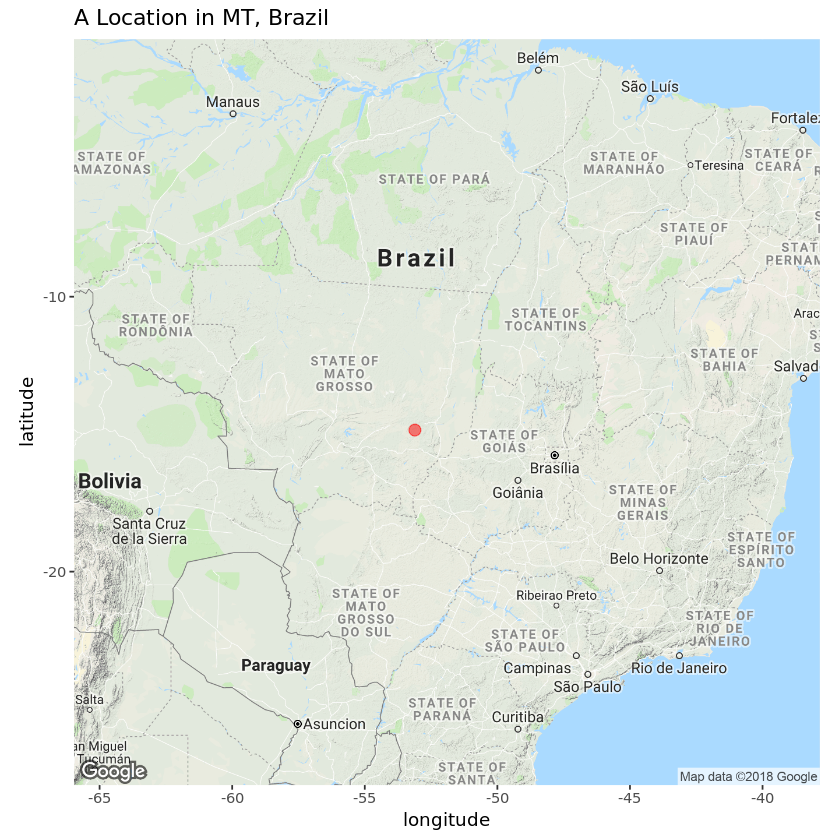

In [15]:
library(ggmap)

longitude <- -53.11
latitude  <- -14.91

points <- data.frame(lon = longitude, lat = latitude)

map <- get_map(location = "BRAZIL", zoom = 5)

ggmap(map) + 
  geom_point(data = points, color = "red", size = 3, alpha=0.5) +
  labs(x = "longitude", y = "latitude", title = "A Location in MT, Brazil")

Now, let's use WTSS client to recover the time series associated to the given location for a specific time range:

In [16]:
attributes <- cv_scheme[[cv_name]]$attributes$name

start <- "2002-09-01"
end   <- "2014-08-31"
  
ts <- timeSeries(object = server, 
                 coverages = cv_name, 
                 attributes = attributes, 
                 latitude = latitude, 
                 longitude = longitude, 
                 start = start, 
                 end = end)

6. Plotting the time series using R:

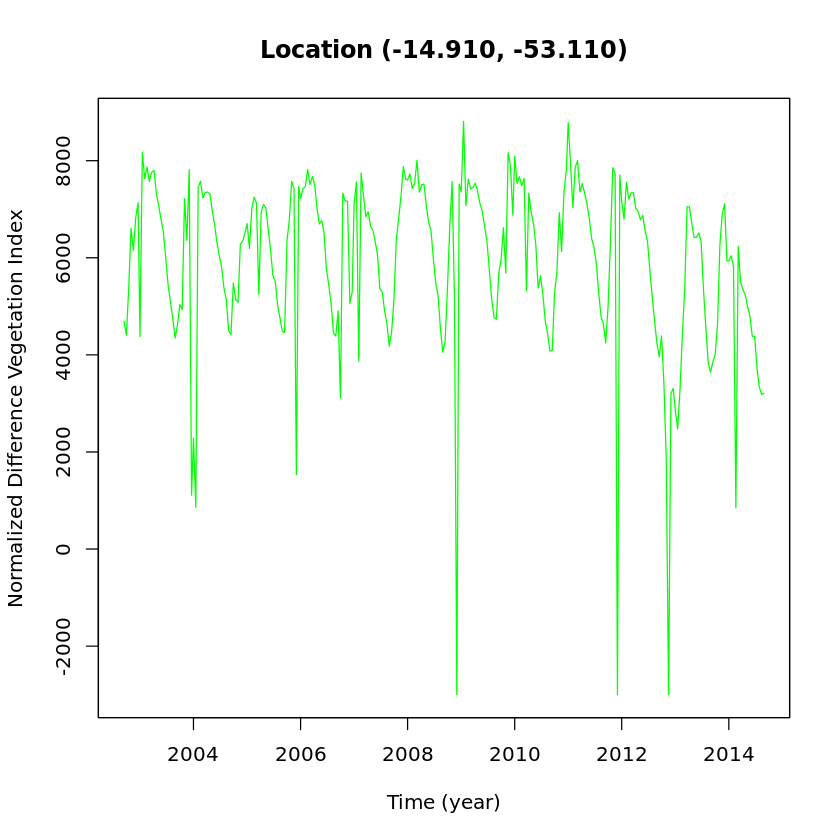

In [17]:
plot(ts[[1]]$attributes$ndvi,
     main=sprintf("Location (%5.3f, %5.3f)", 
                  latitude,
                  longitude), 
     xlab="Time (year)", 
     ylab="Normalized Difference Vegetation Index",
     col="green", col.lab="black")

7. Smoothing the time series with using a moving average methods (available in a third-party R package):

In [ ]:
library(TTR)

smoothed_ndvi <- SMA( ts[[1]]$attributes$ndvi * 0.0001, n = 3 )

plot( smoothed_ndvi,
      ylim = range( smoothed_ndvi, na.rm = TRUE ),
      xlab = "", ylab = "", col = "blue" )

## <span style="color:#336699">References</span>
<hr style="border:0.5px solid #336699;">

* [WGISS Tech Webinar - Python for Data Science in Earth Observation Analysis](https://github.com/e-sensing/wgiss-py-webinar)<br><br>

* [SITS_R_notebook](https://github.com/e-sensing/SITS_R_notebook)<br><br>

* [Python Client API for Web Time Series Service](https://github.com/e-sensing/wtss.py)<br><br>

* [R Client API for Web Time Series Service](https://github.com/e-sensing/wtss)